In [1]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

In [2]:
def show_slices(slices):
    """ Function to display row of image slices """
    fig, axes = plt.subplots(1, len(slices))
    for i, slice in enumerate(slices):
        axes[i].imshow(slice.T, cmap="gray", origin="lower")
    plt.show()

In [3]:
epi_img = nib.load('someones_epi.nii.gz')
print(type(epi_img))
print(epi_img.shape)

<class 'nibabel.nifti1.Nifti1Image'>
(53, 61, 33)


In [5]:
epi_img_data = epi_img.get_fdata()
print(epi_img_data)

[[[10.75507164 11.13163662 10.75507164 ...  8.87224674  8.11911678
    8.11911678]
  [10.75507164 11.13163662 10.37850666 ...  9.6253767  10.00194168
    8.87224674]
  [10.75507164 11.13163662 10.75507164 ... 10.37850666 10.00194168
    9.6253767 ]
  ...
  [10.37850666 10.75507164 10.37850666 ... 10.00194168 10.00194168
    8.49568176]
  [10.37850666 10.75507164 10.75507164 ...  9.6253767   9.6253767
    8.87224674]
  [10.75507164 10.37850666 10.75507164 ... 10.00194168  9.24881172
    8.49568176]]

 [[11.13163662 11.13163662 11.5082016  ...  9.24881172  8.87224674
    8.11911678]
  [11.13163662 11.13163662 11.13163662 ...  9.6253767  10.00194168
    8.87224674]
  [11.5082016  11.5082016  11.13163662 ...  9.6253767  10.00194168
    9.6253767 ]
  ...
  [10.75507164 10.75507164 10.37850666 ... 10.00194168  9.24881172
    9.6253767 ]
  [10.75507164 10.75507164 10.37850666 ... 10.00194168  8.87224674
    8.49568176]
  [10.37850666 10.37850666 10.75507164 ...  9.6253767   8.87224674
    8.4

In [6]:
print(epi_img.header)

<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b''
dim_info        : 0
dim             : [ 3 53 61 33  1  1  1  1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : uint8
bitpix          : 8
slice_start     : 0
pixdim          : [1. 3. 3. 3. 1. 1. 1. 1.]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 2
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b''
aux_file        : b''
qform_code      : mni
sform_code      : mni
quatern_b       : 0.14943813
quatern_c       : -0.0
quatern_d       : -0.0
qoffset_x       : -78.0
qoffset_y       : -76.0
qoffset_z       : -64.0
srow_x          : [  3.   0.   0. -78.]
srow_y          : [

In [18]:
b = 0.14943813
c = 0.0
d = 0.0
a = np.sqrt(1 - b**2 - c**2 - d**2)
q = (a, b, c, d)
nib.eulerangles.quat2euler(q)

(-0.0, 0.0, 0.29999999499661895)

The files of medical images are typically in NIFTI format. They have a numpy array of voxel values and some metadata.

26 30 16


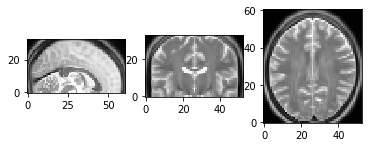

In [7]:
n_i, n_j, n_k = epi_img_data.shape
center_i = (n_i - 1) // 2  # // for integer division
center_j = (n_j - 1) // 2
center_k = (n_k - 1) // 2
print(center_i, center_j, center_k)
show_slices([
    epi_img_data[center_i,:,:],
    epi_img_data[:,center_j,:],
    epi_img_data[:,:,center_k]
])

In [8]:
anat_img = nib.load('someones_anatomy.nii.gz')
print(type(anat_img))
print(anat_img.shape)

<class 'nibabel.nifti1.Nifti1Image'>
(57, 67, 56)


In [9]:
anat_img_data = anat_img.get_fdata()

28 33 27


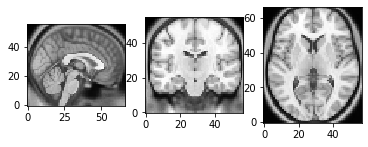

In [10]:
n_i, n_j, n_k = anat_img_data.shape
center_i = (n_i - 1) // 2  # // for integer division
center_j = (n_j - 1) // 2
center_k = (n_k - 1) // 2
print(center_i, center_j, center_k)
show_slices([
    anat_img_data[center_i,:,:],
    anat_img_data[:,center_j,:],
    anat_img_data[:,:,center_k]
])

As you can see, different images of the same subject have different sizes and centers. The numpy arrays have voxels with integer coordinates i, j, k, which are different for each image. They all represent coordinates in the scanner reference x, y, z space.

The origin of the scanner xyz space is the magnet isocenter, and goes in RAS+ directions (the x axis goes left to Right, the y axis goes posterior to Anterior, the z axis goes inferior to Superior). The unit is in mm.

The map from ijk space to xyz space is an affine transformation
$$
\begin{bmatrix}
    x \\
    y \\
    z
\end{bmatrix}=
\begin{bmatrix}
    a_{11}&a_{12}&a_{13}\\
    a_{21}&a_{22}&a_{23}\\
    a_{31}&a_{32}&a_{33}
\end{bmatrix}
\begin{bmatrix}
    i \\
    j \\
    k
\end{bmatrix}+
\begin{bmatrix}
    b_1 \\
    b_2 \\
    b_3
\end{bmatrix}
$$
or equivalently
$$
\begin{bmatrix}
    x \\
    y \\
    z \\
    1
\end{bmatrix}=
\begin{bmatrix}
    a_{11}&a_{12}&a_{13}&b_1\\
    a_{21}&a_{22}&a_{23}&b_2\\
    a_{31}&a_{32}&a_{33}&b_3\\
    0&0&0&1
\end{bmatrix}
\begin{bmatrix}
    i \\
    j \\
    k \\
    1
\end{bmatrix}
$$

In [19]:
print(anat_img.affine)
print(anat_img.affine.dot(np.array([28, 33, 27, 1])))
from nibabel.affines import apply_affine
apply_affine(anat_img.affine, np.array([28, 33, 27]))

[[  2.75   0.     0.   -78.  ]
 [  0.     2.75   0.   -91.  ]
 [  0.     0.     2.75 -91.  ]
 [  0.     0.     0.     1.  ]]
[ -1.    -0.25 -16.75   1.  ]


array([ -1.  ,  -0.25, -16.75])

In [12]:
print(epi_img.affine)
print(epi_img.affine.dot(np.array([26, 30, 16, 1])))

[[  3.           0.           0.         -78.        ]
 [  0.           2.86600947  -0.88656062 -76.        ]
 [  0.           0.88656062   2.86600947 -64.        ]
 [  0.           0.           0.           1.        ]]
[ 0.         -4.20468569  8.45297015  1.        ]


Nibabel also is able to handle diffusion weighted tractography, which is how we map out connections in the brain. Let's take an example, amalgamated from a few dozen patients.

In [13]:
tck = nib.streamlines.load('tractogram.tck', lazy_load=True)

In [14]:
tck.header

{'count': '0000006161',
 'datatype': 'Float32LE',
 'file': '. 67',
 'magic_number': b'mrtrix tracks',
 'endianness': '<',
 '_dtype': dtype('float32'),
 '_offset_data': 67,
 'voxel_to_rasmm': array([[1., 0., 0., 0.],
        [0., 1., 0., 0.],
        [0., 0., 1., 0.],
        [0., 0., 0., 1.]])}

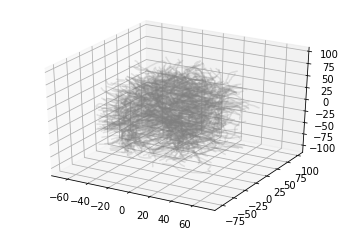

In [15]:
fig = plt.figure()
ax = plt.axes(projection='3d')
for i, s in enumerate(tck.streamlines):
    if i%10==0:
        ax.plot3D(s[:,0], s[:,1], s[:,2], alpha=0.2, c='gray')
plt.show()